# Avocado Data Analysis (Guided Tutorial)

This notebook will analyze the Avocado Prices Dataset, which analyze how the prices of different types of avocados change in response to their handling, the date that they were sold and the total volume of what was sold. This dataset examines Hass Avocados, which are commonly used to make avocado toast in homes nationwide. Three types of Hass Avocados are shown in the dataset: PLU 4046 (extra small), PLU 4225 (small) and PLU 4770 (large).

Let's begin our analysis of this dataset by importing the required libraries and getting to look at the dataset.

1. `matplotlib.pyplot` allows us to graph the data and see relationships between them before we do any machine learning.


2. `pandas` allows us to visualize our data in a Python Excel Worksheet. We can do many operations in `pandas` that allows us to manipulate the data to see any things that need changing before we undergo machine learning.


3. `sklearn` is a machine learning library where we will use algorithms to learn relationships between the data. If we come up with a research question about our data, we can use this library to answer our question using machine learning.


4. `tensorflow` is a deep learning library that will be used to see if deep learning can give us a better result for our research question without overfitting the data.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

## Exploratory Data Analysis

We begin first by getting to look at our dataset by importing it from its csv file.

This is done using the `read_csv` method from the `pandas` library.

In [5]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


As you can see, there is a lot of columns containing both numerical data and categorical data from the dataset.

Before we can begin our analysis of the columns of the dataset, we should remove the `Unnamed: 0` column since it brings only a duplicate index to our dataset. 

This can be done by dropping the column using the `df.drop` method, specifying an axis of `1` (1 = column, 0 = row). Since we don't need to keep a copy of the dataframe with this column lying around, I use the `inplace` parameter to directly change the DataFrame instead of creating a copy.

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


To start up our data analysis, let's statisically describe our data and find the different regions where avocados are grown using the `region` column. A statistically description of the data is done with the `df.describe()` method of the dataset.

Notice that `df.describe()` only provides statistical analysis of the numerical columns.

In [7]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Statistical analysis of the categorical columns of the dataframe can be done by specifying the datatype of the columns to be described. For categorical data, we need to specify the `np.object` as a parameter into the keyword argument `include` in the method.

In [8]:
df.describe(include=np.object)

,Date,type,region
count,18249,18249,18249
unique,169,2,54
top,2015-11-15,conventional,Albany
freq,108,9126,338


Now, let's see the different regions where avocados are grown by isolating the `region` column from the dataframe and using the `value_counts()` method. This method will count the frequency of each region in the column and note it in a column (or specifically a `pd.Series`).

In [9]:
df['region'].value_counts()

Albany                 338
RaleighGreensboro      338
Spokane                338
CincinnatiDayton       338
Boston                 338
Nashville              338
Boise                  338
Jacksonville           338
Detroit                338
Pittsburgh             338
Sacramento             338
Columbus               338
GreatLakes             338
Syracuse               338
StLouis                338
Seattle                338
BuffaloRochester       338
Chicago                338
MiamiFtLauderdale      338
TotalUS                338
Midsouth               338
NorthernNewEngland     338
Southeast              338
BaltimoreWashington    338
Houston                338
GrandRapids            338
Philadelphia           338
NewOrleansMobile       338
LasVegas               338
SanDiego               338
SouthCarolina          338
Tampa                  338
Louisville             338
NewYork                338
West                   338
HartfordSpringfield    338
Portland               338
S

It seems that avocados in this dataset are equally recorded from each of the different cities listed above. I gather this from the frequency of 338 records in the dataset for each U.S. city. However, there are 335 records for the West Texan / New Mexican area. 

If I didn't have as much of a keen eye, I could visualize some of these records in a *horizontal bar graph* as seen below.

### Primer To Plots

Plots will be discussed in the machine learning club in later detail but there are essentially three things to know in order to create a generic plot using `matplotlib`. These steps apply to any plot except a histogram or pie plot.

1. The first argument in the "`plot`" function must be the x-values to put into the plot.


2. The second argument in the "`plot`" function must be the y-values to put into the plot.


3. Optional Arguments can be added in the "`plot`" function to change the color and style of the plot. In this example, I used the `color` keyword argument to provide my own hex color to color the inside of each of the bars. The `edgecolor` argument was also used to give a black outline to each bar to emphasize their length.

In addition to these three steps, you might want to use the `plt.title`, `plt.xlabel` and `plt.ylabel` methods to give your plot a title and labels for your x and y axis. Plots are a good way to visualize your data so try to make as many informative plots as possible.



Text(0.5,1,'Sample of Records of Avocados Sold In Different Cities')

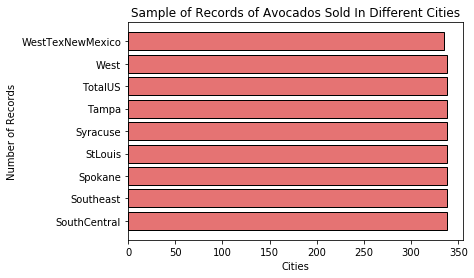

In [10]:
plt.barh(df['region'].unique()[45:54], df['region'].value_counts().values[45:54], color = '#e57373', edgecolor ='black')
plt.xlabel('Cities')
plt.ylabel('Number of Records')
plt.title('Sample of Records of Avocados Sold In Different Cities')

#### Time Plots

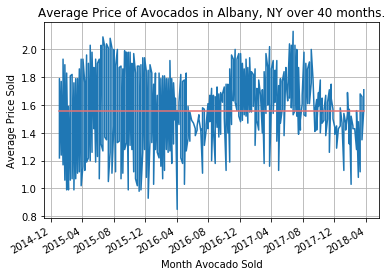

In [11]:
albany_df = df[df['region'] == 'Albany'].sort_values('Date')
albany_df['Date'] = pd.to_datetime(albany_df['Date'])
albany_avocado_median = [albany_df['AveragePrice'].median()] * len(albany_df['AveragePrice'])

plt.plot(albany_df['Date'], albany_df['AveragePrice'])
plt.plot(albany_df['Date'], albany_avocado_median, color="#e57373")
plt.xlabel('Month Avocado Sold')
plt.ylabel('Average Price Sold')
plt.title('Average Price of Avocados in Albany, NY over 40 months.')

plt.gcf().autofmt_xdate()
plt.grid()

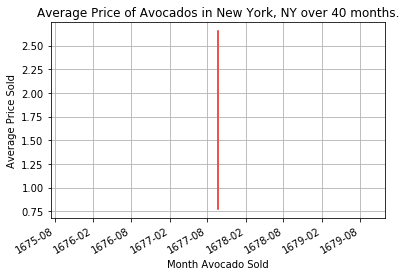

In [12]:
ny_df = df[df['region'] == 'NewYork'].sort_values('Date')
ny_df['Date'] = pd.to_datetime(albany_df['Date'])
ny_avocado_median = [ny_df['AveragePrice'].median()] * len(ny_df['AveragePrice'])

plt.plot(ny_df['Date'], ny_df['AveragePrice'], color="#ef5350")
plt.plot(ny_df['Date'], ny_avocado_median, color="#64b5f6")
plt.xlabel('Month Avocado Sold')
plt.ylabel('Average Price Sold')
plt.grid()
plt.title('Average Price of Avocados in New York, NY over 40 months.')
plt.gcf().autofmt_xdate()

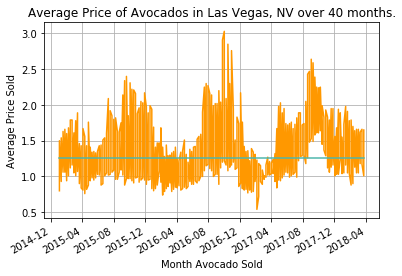

In [13]:
lv_df = df[df['region'] == 'LasVegas'].sort_values('Date')
lv_df['Date'] = pd.to_datetime(lv_df['Date'])
ny_avocado_median = [lv_df['AveragePrice'].median()] * len(lv_df['AveragePrice'])

plt.plot(lv_df['Date'], lv_df['AveragePrice'], color="#ff9800")
plt.plot(lv_df['Date'], ny_avocado_median, color="#4db6ac")
plt.xlabel('Month Avocado Sold')
plt.ylabel('Average Price Sold')
plt.grid()
plt.title('Average Price of Avocados in Las Vegas, NV over 40 months.')
plt.gcf().autofmt_xdate()

### Other Data Exploration Plots

Text(0.5,1,'Effect of Avocado Type on Average Price')

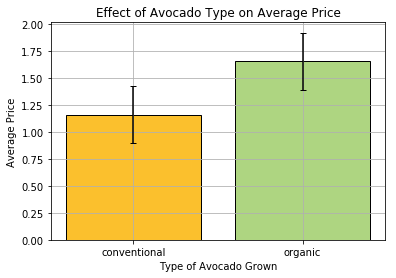

In [14]:
price_conv_mean = df[df['type'] == 'conventional']['AveragePrice'].mean()
price_conv_std = df[df['type'] == 'conventional']['AveragePrice'].std()

price_org_mean = df[df['type'] == 'organic']['AveragePrice'].mean()
price_org_std = df[df['type'] == 'conventional']['AveragePrice'].std()

plt.bar(['conventional', 'organic'], [price_conv_mean, price_org_mean], 
        yerr=[price_conv_std, price_org_std], capsize=3, color=["#fbc02d", "#aed581"], edgecolor='black')

plt.grid()
plt.xlabel('Type of Avocado Grown')
plt.ylabel('Average Price')
plt.title('Effect of Avocado Type on Average Price')

Now, let's check for any null data to check if we need to impute anything.

In [19]:
from scipy.stats import ttest_ind

ttest_ind(df[df['type'] == 'conventional']['AveragePrice'], df[df['type'] == 'organic']['AveragePrice']).pvalue

0.0

In [77]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Sweet, no null values!